<div style="text-align: center;">
    <h1 style="color: #FF6347;">Introduction to Natural Language Processing</h1>
</div>

<div style="text-align: center;">
    <img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExM2oxemt5MzN4NDlzcnllODFvcWgyNm5vZnBwMnBsYjZubTZhbHMwciZlcD12MV9pbnRlcm5naWZfYnlfaWQmY3Q9Zw/7VzgMsB6FLCilwS30v/giphy-downsized-large.gif" alt="NLP Gif" style="width: 300px; height: 150px; object-fit: cover; object-position: center;">
</div>

Natural Language Processing (NLP) is a branch of artificial intelligence that deals with the interaction between computers and human languages. It aims to analyze, understand, and generate natural language in a way that is meaningful and valuable. NLP has numerous applications across industries, from virtual assistants to sentiment analysis in social media.

<h3 style="color: #FF8C00;">Key Areas of NLP</h3>

- **Text Classification**: Assigning categories to text, such as spam detection and sentiment analysis.

______________________

<h2 style="color: #FF6347;">Sentiment Analysis</h2>

Sentiment analysis is a subset of text classification, one of the key tasks in NLP. It specifically focuses on determining the sentiment, tone, or opinion expressed in a piece of text. 

<h3 style="color: #FF8C00;">By the end of this lesson, you'll:</h3>

- Understand the basics of Sentiment Analysis
- Learn how to preprocess text data
- Apply NLP techniques to extract meaningful insights
- Perform sentiment analysis on a sample dataset

In [ ]:
#pip install nltk
#pip install seaborn
#pip install plotly

In [ ]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np
import warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

# 🤖 NLP Libraries
import nltk # natural language toolkit

In [ ]:
# 🔧 Make your functions:
# Save this file as my_functions.py
# Import your functions in your notebook
# from my_functions import *

def snake_columns(data):
    """
    Standarize and returns snake_case columns
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #FF6347;">Data Extraction</h2>

In [ ]:
df = pd.read_csv("amazon_reviews.csv")

<h2 style="color: #FF6347;">EDA: First Exploration</h2>

<h3 style="color: #FF8C00;">Overview</h3>

The dataset contains Amazon product reviews with various features related to the reviews.

<h3 style="color: #FF8C00;">Features</h3>

- **`Id`**: Unique identifier for each review.
- **`ProductId`**: Unique identifier for the product.
- **`UserId`**: Unique identifier for the user who wrote the review.
- **`ProfileName`**: Name of the user who wrote the review.
- **`HelpfulnessNumerator`**: Number of users who found the review helpful.
- **`HelpfulnessDenominator`**: Number of users who indicated whether they found the review helpful.
- **`Score`**: Rating given by the user (1 to 5).
- **`Time`**: Timestamp for the review.
- **`Summary`**: Short summary of the review.
- **`Text`**: Full text of the review.

<h2 style="color: #FF6347;">Data Cleaning</h2>

In [ ]:
snake_columns(df)

<h3 style="color: #FF8C00;">Feature Selection</h3>

From the dataframe `df`, we are particularly interested in the following columns:

- **`score`**: Useful for comparing our sentiment analysis results.
- **`summary`**: Provides a brief overview of the review.
- **`text`**: The most important variable in our project. These texts will be broken down into tokens and processed to determine their sentiment.

In [ ]:
df.shape

- Lenght its too big. It would be better if we use a fraction of it to make it easier.

<h2 style="color: #FF6347;">EDA</h2>

- Before we go further, let's plot **`score`** to see its distribution and have an idea of the data we are working with.

In [ ]:
score_counts2 = df2["score"].value_counts().sort_index(ascending=False)
labels = score_counts2.index
sizes = score_counts2.values

In [ ]:
custom_colors = sns.color_palette("Oranges", 5)
plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100):,})', startangle=270, colors=custom_colors, wedgeprops=dict(width=0.2), textprops={'fontsize': 11})
plt.title("Scores Distribution", size=20)
plt.legend(["5: Positive", "4: Positive", "3: Neutral", "2: Negative", "1: Negative"], loc="best")

plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df2['score'], bins=5, density=True, color='orange', alpha=0.5, edgecolor='orange') #
plt.title("Normalized Histogram of Scores")
plt.xlabel("Score")
plt.ylabel("Proportion")
plt.show()

<h2 style="color: #FF6347;">Sentiment Analysis Techniques: VADER and RoBERTa</h2>

Sentiment analysis, also known as opinion mining, is a process of computationally identifying and categorizing opinions expressed in text. There are numerous ways to perform sentiment analysis, but in this introduction, we’ll explore two popular methods:

<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/6f/57/b1/6f57b1a0f7cd78de6f9c8d0a0b8626db.jpg
    " alt="Vader" style="width: 300px; height: 150px; object-fit: cover; object-position: center;">
</div>

<h2 style="color: #FF8C00;">VADER</h2>

VADER stands for **Valence Aware Dictionary and Sentiment Reasoner**. It is a lexicon and rule-based sentiment analysis tool specifically designed to recognize sentiments expressed in informal text, such as social media, reviews, and comments. VADER is part of the Natural Language Toolkit (NLTK) and is ideal for **quick sentiment evaluations**.

- **Bag of Words Approach:**  
    VADER operates using a predefined dictionary of words, each assigned a sentiment score (positive, negative, or neutral). This approach means it evaluates sentiment without fully understanding the context of the text.

<span style="color: green;">**Advantages:**</span>
- **Accessible for Beginners:** It is easy to implement and understand, making it a great starting point for sentiment analysis.
- **Fast and Lightweight:** VADER is optimized for quick prototypes and small-scale projects.
- **Handles Social Media Slang:** It includes specific heuristics for emoticons, emojis, and slang commonly used in social media.

<span style="color: red;">**Limitations:**</span>
- **Lacks Context Awareness:** As a bag-of-words model, it doesn't consider the surrounding context, which can lead to inaccurate predictions for complex sentences.
- **Limited Self-Awareness:** It struggles with understanding nuanced sentiment or sarcasm.

In [ ]:
# vader_lexicon is a lexicon that contains positive and negative words
nltk.download('vader_lexicon')

In [ ]:
# SentimentIntensityAnalyzer will use VADER lexicon to analyze the sentiment of the text
from nltk.sentiment import SentimentIntensityAnalyzer

# vd object will use VADER and SentimentIntensityAnalyzer to analyze the sentiment of the text
vd = SentimentIntensityAnalyzer()

<h2 style="color: #FF8C00;">VADER Test</h2>

In [ ]:
df2.reset_index(drop=True, inplace=True)

In [ ]:
example = df2['text'][0]
example.split(".")

In [ ]:
# .polarity_scores() returns a dictionary with the sentiment scores:

In [ ]:
# dictionary to DataFrame:
vd_df = pd.DataFrame([polarity])
round(vd_df.value_counts(normalize=True).reset_index().rename(columns={'proportion': 'total_score'}), 2)

<h2 style="color: #FF8C00;">VADER Scores</h2>

- **`neg` (Negative Score):**
  - Proportion of text with negative sentiment.
  - Example: `neg = 0.473` → 47.3% negative.

- **`neu` (Neutral Score):**
  - Proportion of text that is neutral.
  - Example: `neu = 0.527` → 52.7% neutral.

- **`pos` (Positive Score):**
  - Proportion of text with positive sentiment.
  - Example: `pos = 0.0` → 0% positive.

- **`compound` (Overall Sentiment):**
  - Weighted score combining all sentiments.
  - Range: `-1.0` (negative) to `1.0` (positive).
  - Example: `compound = -0.8016` → Strong negative sentiment.

<h2 style="color: #FF8C00;">Applying VADER to the DataFrame</h2>

From the dataframe `df`, we are particularly interested in the following columns:

- **`score`**: Useful for comparing our sentiment analysis results.
- **`summary`**: Provides a brief overview of the review.
- **`text`**: The most important variable in our project. These texts will be broken down into tokens and processed to determine their sentiment.

In [ ]:
# Iterate using iterrows for all text:
text_scores = {}
vader_df = pd.DataFrame()

for _, row in df2.iterrows():
    # get the text
    # get polarity dict
    # make a df from polarity dict
    # concat to vader_df

In [ ]:
data_vaders = pd.concat([df2, vader_df], axis=1)  
data_vaders

In [ ]:
data_vaders.groupby('score').get_group(1).sort_values('compound', ascending=True).head(5)

In [ ]:
plt.figure(figsize=(10, 4)) 
sns.boxplot(data=data_vaders, x="score", y="compound", palette="copper", width=0.6, linewidth=0.8)
plt.title('Distribution of Compound Sentiment Scores by Review Score', fontsize=13, pad=5)
plt.xlabel('Review Score', fontsize=14, labelpad=10)
plt.ylabel('Compound Sentiment Score', fontsize=14, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(13, 7))

sns.boxplot(data=data_vaders, x="score", y="compound", palette="copper", width=0.6, linewidth=0.8, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Compound Sentiment Scores by Review Score', fontsize=13, pad=5)
axes[0, 0].set_xlabel('Review Score', fontsize=14, labelpad=10)
axes[0, 0].set_ylabel('Compound Sentiment Score', fontsize=14, labelpad=10)
axes[0, 0].tick_params(axis='x', labelsize=10)
axes[0, 0].tick_params(axis='y', labelsize=10)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(data=data_vaders, x="score", y="neg", palette="copper", width=0.6, linewidth=0.8, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Negative Sentiment Scores by Review Score', fontsize=13, pad=5)
axes[0, 1].set_xlabel('Review Score', fontsize=14, labelpad=10)
axes[0, 1].set_ylabel('Negative Sentiment Score', fontsize=14, labelpad=10)
axes[0, 1].tick_params(axis='x', labelsize=10)
axes[0, 1].tick_params(axis='y', labelsize=10)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(data=data_vaders, x="score", y="neu", palette="copper", width=0.6, linewidth=0.8, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Neutral Sentiment Scores by Review Score', fontsize=13, pad=5)
axes[1, 0].set_xlabel('Review Score', fontsize=14, labelpad=10)
axes[1, 0].set_ylabel('Neutral Sentiment Score', fontsize=14, labelpad=10)
axes[1, 0].tick_params(axis='x', labelsize=10)
axes[1, 0].tick_params(axis='y', labelsize=10)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(data=data_vaders, x="score", y="pos", palette="copper", width=0.6, linewidth=0.8, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Positive Sentiment Scores by Review Score', fontsize=13, pad=5)
axes[1, 1].set_xlabel('Review Score', fontsize=14, labelpad=10)
axes[1, 1].set_ylabel('Positive Sentiment Score', fontsize=14, labelpad=10)
axes[1, 1].tick_params(axis='x', labelsize=10)
axes[1, 1].tick_params(axis='y', labelsize=10)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h3 style="color: #FF8C00;">Conclusions from Sentiment Analysis:</h3>

1. **Sentiment by Review Score:**
   - **Score 5**: Strongly positive sentiment.
   - **Score 1**: Strongly negative sentiment.
   - **Scores 2–4**: Mixed sentiment with varied compound scores.

<div style="text-align: center;">
    <img src="https://www.investopedia.com/thmb/ulGrKT5WnVclGMOgQQVe65OtmeI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/large-language-model-7563532-final-9e350e9fa02d4685887aa061af7a2de2.png" alt="Roberta" style="width: 300px; height: 150px; object-fit: cover; object-position: center;">
</div>

<h3 style="color: #FF8C00;">About Large Language Models & Transformers</h3>

Large Language Models (LLMs) are advanced AI systems trained on massive datasets to understand and generate human-like language. They use deep learning techniques, primarily **transformer architectures**, to excel in various natural language processing (NLP) tasks such as translation, summarization, and sentiment analysis.


<h4 style="color: #FF4500;">What is a Transformer?</h4>
Transformers are a type of neural network architecture designed to process sequential data, such as text, more efficiently than traditional models like recurrent neural networks (RNNs). They revolutionized NLP by introducing a **self-attention mechanism** that allows models to focus on the most relevant parts of a sentence while processing.

**Key Features of Transformers:**
- **Self-Attention Mechanism:** Enables the model to weigh the importance of each word in a sentence relative to all others, capturing context effectively.
- **Parallel Processing:** Processes entire sequences simultaneously rather than sequentially, leading to faster computation.
- **Encoder-Decoder Framework:** Commonly used for tasks like machine translation, where the **encoder** processes the input and the **decoder** generates the output.

Transformers serve as the backbone of LLMs, enabling powerful and scalable AI models like BERT, RoBERTa, and GPT.


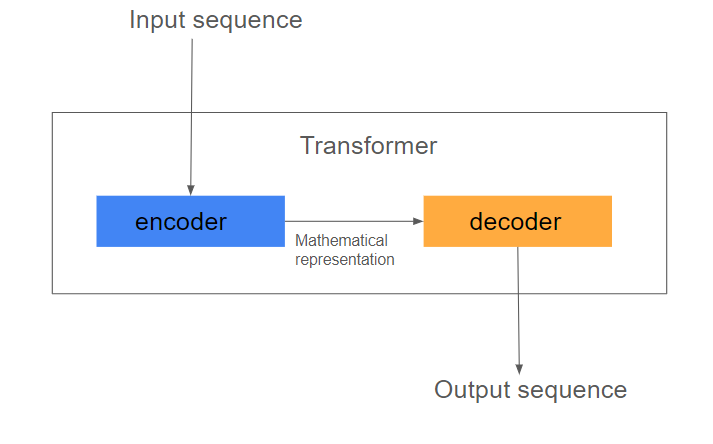

<h4 style="color: #FF4500;">Types of Transformers</h4>

1. **Encoder-Only Models**  
   - Example: **BERT, RoBERTa**
   - Focus: Deep understanding of input text for tasks like sentiment analysis, classification, and question answering.

2. **Decoder-Only Models**  
   - Example: **GPT (Generative Pretrained Transformer)**
   - Focus: Text generation tasks such as dialogue, content creation, and language modeling.

3. **Encoder-Decoder Models**  
   - Example: **T5 (Text-to-Text Transfer Transformer), BART**
   - Focus: Tasks that involve both understanding input and generating output, such as translation, summarization, and paraphrasing.

<span style="color: green;">**Advantages:**</span>
- Highly flexible and scalable for diverse NLP tasks.
- Efficient handling of long-range dependencies in text.
- Forms the backbone of state-of-the-art language models.

<span style="color: red;">**Limitations:**</span>
- Requires substantial computational resources to train and deploy.
- Prone to overfitting without proper regularization.
- Large models may generate biased or inappropriate content without fine-tuning.

Transformers have redefined NLP, making them the core architecture for nearly all modern language models.

<div style="text-align: center;">
    <img src="https://img.freepik.com/premium-photo/robot-is-enhancing-its-knowledge-by-reading-book-library_98402-207776.jpg" alt="Roberta" style="width: 300px; height: 150px; object-fit: cover; object-position: center;">
</div>

<h3 style="color: #FF8C00;">RoBERTa</h3>

RoBERTa stands for **A Robustly Optimized BERT Approach**. It is a transformer-based model that builds on the BERT architecture by pretraining on larger datasets and using dynamic masking. Unlike VADER, RoBERTa is a **contextualized sentiment analysis tool** that deeply understands the meaning of text.

**Key Features of RoBERTa:**
- **Transformer Architecture:**  
    Uses a neural network model that takes into account the entire sentence context for accurate sentiment predictions.

<span style="color: green;">**Advantages:**</span>
- **Context-Aware Analysis:** Unlike VADER, RoBERTa can interpret nuanced meanings, idioms, and even sarcasm.
- **High Accuracy:** Particularly effective for complex tasks such as mood analysis, opinion extraction, and review summarization.

<span style="color: red;">**Limitations:**</span>
- **Computationally Intensive:** Requires more resources and time compared to lexicon-based methods.
- **Requires Training:** Needs fine-tuning on domain-specific datasets for optimal results.

In [ ]:
# pip install transformers

In [ ]:
import tensorflow as tf

We will use a pre-trained RoBERTa model named "Emotion English DistilRoBERTa-base".
- This model is specifically refined to analyze text and categorize it into various emotional moods.
- The model's embeddings are designed to effectively break down and interpret the emotional content of the text.

In [ ]:
# Try also Hugging Face's Transformers
model = "j-hartmann/emotion-english-distilroberta-base"

In [ ]:
# pip install tf-keras
# We need to install tf-keras because the model is a TensorFlow model

In [ ]:
from transformers import pipeline

In [ ]:
roberta = pipeline("text-classification", model, return_all_scores=True)

In [ ]:
roberta("It's really nice to meet you")

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model)

In [ ]:
test = tokenizer("It's really nice to meet you")
test

<h3 style="color: #FF8C00;">Using Transformers for Sequence Classification</h3>

The `transformers` library from Hugging Face provides a powerful interface to work with pre-trained transformer models for various tasks. One such task is **sequence classification**, where the model processes a sequence of tokens (such as text) and outputs a classification label.

The `TFAutoModelForSequenceClassification` class allows you to load a pre-trained transformer model specifically for sequence classification tasks. It is designed to work seamlessly with TensorFlow.

<h4 style="color: #FF4500;">What is Sequence Classification?</h4>

Sequence classification is a task where the model:
1. **Input:** Receives a sequence of tokens (e.g., a sentence or document).
2. **Processing:** Encodes the sequence using a transformer model.
3. **Output:** Predicts a category or label based on the input sequence.

<h4 style="color: #FF4500;">Common Use Cases</h4>

- **Sentiment Analysis:** Classify text as positive, negative, or neutral.
- **Spam Detection:** Determine whether a text or email is spam or not.
- **Intent Recognition:** Identify user intent in conversational AI.

In [ ]:
def mooder(text):
    """
    This function will return the mood of the text
        returns_tensors="tf" will return the tokens as a TensorFlow tensor
        max_length=512 will limit the number of tokens to 512
        truncation=True will truncate the text if it exceeds the max_length
        padding="longest" will pad the text to the longest sequence in the batch
    """
    encoded_text = tokenizer(text, return_tensors="tf", max_length=512, truncation=True, padding="longest")
    output = model(encoded_text)
    scores = output.logits[0].numpy()
    moods = {
        "anger": scores[0],
        "disgust": scores[1],
        "fear": scores[2],
        "joy": scores[3],
        "neutral": scores[4],
        "sadness": scores[5],
        "surprise": scores[6]
    }
    return moods

In [ ]:
from transformers import TFAutoModelForSequenceClassification # will use the model for sequence classification

model = TFAutoModelForSequenceClassification.from_pretrained(model)

In [ ]:
df3 = df.sample(500)

In [ ]:
roberta_df = df3["text"].apply(mooder)

- **Range of Values**:  
  - The scores are **logits** (raw model outputs) that can range from **negative** to **positive**.  
  - **Higher positive values** → Stronger presence of the emotion.  
  - **Lower negative values** → Absence of the emotion.  

- **Examples**:  
  - **`joy = 3.125`**: Indicates a strong presence of joy.  
  - **`sadness = -2.810`**: Suggests sadness is not present.  

In [ ]:
def normalize_logits(row):
      scores = np.exp(row)
      return scores / scores.sum()

# Range of 0 to 1
normalized_scores = roberta_scores.apply(normalize_logits, axis=1)
normalized_scores.head()

<h3 style="color: #FF8C00;">Emotions Detected by RoBERTa</h3>

RoBERTa, as a transformer-based model, can be fine-tuned for emotion detection tasks. Emotion detection involves analyzing text to identify and classify the underlying emotional tone. The following emotions can be detected by RoBERTa when fine-tuned appropriately:

- **Anger**: Indicates the presence of anger in the text, often associated with frustration or hostility.
- **Disgust**: Reflects feelings of aversion or disapproval expressed in the text.
- **Fear**: Captures the sentiment of fear or apprehension within the text, often tied to uncertainty or danger.
- **Joy**: Represents the level of happiness, excitement, or positive emotions conveyed in the text.
- **Neutral**: Indicates a neutral sentiment, where the text does not lean towards any strong positive or negative emotion.
- **Sadness**: Measures the extent of sadness, sorrow, or grief expressed in the text.
- **Surprise**: Detects any surprising elements, such as shock or unexpected outcomes, within the text.

<h4 style="color: #FF4500;">Origin of These Emotions: Ekman’s Psychology</h4>

The emotions identified above are based on the work of **Dr. Paul Ekman**, a renowned psychologist who proposed the concept of **basic emotions**. According to Ekman, these are universal emotions experienced by humans across all cultures, and they include:

- **Anger**
- **Disgust**
- **Fear**
- **Happiness (Joy)**
- **Sadness**
- **Surprise**
  
<div style="text-align: center;">
    <img src="https://www.researchgate.net/profile/Xin-Wang-532/publication/346179935/figure/fig1/AS:1056708940034050@1628950452477/Ekmans-six-basic-emotions-and-Plutchiks-wheel-of-emotions-the-middle-circle-contains-8.ppm" alt="NLP Gif" style="width: 400px; height: 200px; object-fit: cover; object-position: center;">
</div>

Ekman’s research demonstrated that these emotions are biologically hardwired and universally recognized, primarily through facial expressions. Over time, these basic emotions have been adapted for various applications, including sentiment analysis and emotion detection in text data.

<h4 style="color: #FF4500;">Applications of Ekman’s Basic Emotions in AI</h4>

- **Emotion Detection Models**: AI systems, like those based on RoBERTa, use Ekman’s framework to classify textual data into emotional categories.
- **Cross-Cultural Studies**: These universal emotions enable models to work effectively across languages and cultures.
- **Human-Machine Interaction**: Emotional understanding enhances AI-driven applications like chatbots and virtual assistants.

In [ ]:
df3.reset_index(drop=True, inplace=True)

In [ ]:
moods = pd.concat([df3, roberta_scores], axis=1)

In [ ]:
moods.sample(5)

In [ ]:
sns.boxplot(data=roberta_scores)

<h2 style="color: #FF8C00;">Take-Home Messages</h2>

1. **VADER Sentiment Analysis**:
    - Efficiently captures sentiment, aligning well with review scores.
    - Ideal for quick sentiment evaluations, especially for social media and informal text.

2. **RoBERTa Emotion Detection**:
    - Provides nuanced understanding by identifying specific emotions.
    - Suitable for detailed sentiment analysis and mood detection in complex texts.

3. **Model Comparison**:
    - **VADER**: Fast, lightweight, and easy to implement.
    - **RoBERTa**: Higher accuracy with context-aware analysis, but more computationally intensive.
    - Choose based on the specific requirements of the sentiment analysis task.
